# Prediction of Product Sales
Explaining Models with Shap

## Import Necessary Libraries

In [196]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

## Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Import shap and initialize javascript:
import shap
shap.initjs()

## saving variables for next notebook
import joblib

# Permanently changes the pandas settings
pd.set_option('display.max_columns', None)

from sklearn import set_config
set_config(display='diagram')

# Lime 
from lime.lime_tabular import LimeTabularExplainer

# display values with two decimal places and comma separation for powers of thousands.
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

## Load the Data

In [197]:
loaded = joblib.load('best-models.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'DecisionTreeRegressor'])

In [198]:
X_train = loaded['X_train']
y_train = loaded['y_train']
X_test = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
linreg = loaded['LinearRegression']
dec_tree = loaded['DecisionTreeRegressor']

# Shap: Tree-Based Model Explanation

## Preparing Data for Shap

In [199]:
# Check length of X data
len(X_train)

6392

In [200]:
# Take 400 observations from X_train and save them as X_shap
X_shap = shap.sample(X_train, nsamples = 400, random_state = 42)
X_shap.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
2937,8.37,0.04,191.32,"1,987.00",2.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
6371,9.70,0.03,221.31,"2,009.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
3762,17.25,0.00,37.58,"1,998.00",0.76,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
419,19.00,0.03,127.33,"2,007.00",0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
8475,18.60,0.08,92.54,"1,999.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00


In [201]:
# Get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap.head()

2937   2,285.03
6371   2,217.11
3762     196.41
419    2,940.17
8475     378.17
Name: Item_Outlet_Sales, dtype: float64

In [202]:
# Create a SHAP explainer using the fit model
explainer = shap.Explainer(dec_tree)
explainer

In [203]:
# Get SHAP values
shap_values = explainer(X_shap, y_shap)
type(shap_values)

shap._explanation.Explanation

In [204]:
# Check shape of X values
X_shap.shape

(400, 35)

In [205]:
# Check shape of shap_values
shap_values.shape

(400, 35)

In [206]:
# Exploring SHAP explanation values
shap_values[0]

.values =
array([-2.51735343e+02,  6.49509224e+00,  2.76829384e+02,  6.88682797e+00,
        8.93381291e+00, -4.51843929e+00, -1.88841283e+00, -1.41124994e+01,
       -5.49799302e+00,  1.46413105e+00, -6.99377275e+00,  7.44527945e+00,
        2.22593134e+00,  3.04880498e-01, -3.35014463e+00,  1.07332330e+00,
       -8.30978277e-01, -4.29394785e-01, -5.83221043e+00,  1.13386811e+01,
       -1.71657923e+01,  3.76859823e-01, -3.47389937e-02, -2.96833769e+00,
        2.26541406e+00, -7.48934422e+00, -4.33367293e+01,  5.33809986e+01,
       -1.62331936e+01,  2.93932661e+01, -6.93066700e-01, -1.01838372e+00,
        3.26981073e+02, -1.17319465e+02, -1.58900472e+02])

.base_values =
array([2209.9793572])

.data =
array([8.3650000e+00, 3.9811272e-02, 1.9131880e+02, 1.9870000e+03,
       2.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000

In [207]:
# View SHAP values for every sample for each feature in DF format
pd.DataFrame(shap_values.values, columns = X_shap.columns).head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-251.74,6.50,276.83,6.89,8.93,-4.52,-1.89,-14.11,-5.50,1.46,-6.99,7.45,2.23,0.30,-3.35,1.07,-0.83,-0.43,-5.83,11.34,-17.17,0.38,-0.03,-2.97,2.27,-7.49,-43.34,53.38,-16.23,29.39,-0.69,-1.02,326.98,-117.32,-158.90
1,18.51,-174.03,493.77,33.33,11.50,-42.47,0.12,-4.68,-3.72,1.78,-2.50,-4.35,2.80,0.53,-2.70,-3.27,0.15,-0.45,-84.20,-1.24,-1.04,0.27,0.11,11.29,0.17,-7.75,-20.11,0.17,-25.84,-5.05,-3.61,0.26,-525.94,561.46,-216.15
2,30.39,30.09,"-1,019.97",-6.95,-5.73,-9.14,0.41,-0.90,-0.99,0.23,-13.82,-5.00,-7.18,-8.82,-2.81,-0.22,-0.89,-1.18,2.12,-3.10,-0.01,-0.00,-1.05,-55.19,20.51,-32.77,-0.61,3.28,0.11,-1.65,0.15,0.97,-631.41,-182.60,-109.83
3,296.14,179.94,134.49,8.84,-30.77,-30.74,-1.36,1.24,-2.38,0.87,2.60,-22.01,4.20,-7.24,17.80,36.33,0.36,-0.58,-9.23,-2.13,-2.90,-2.71,0.77,-3.18,0.08,-7.06,-21.61,-12.52,1.64,0.59,-0.75,5.54,426.29,-90.95,-139.41
4,-388.94,-184.35,"-1,023.58",-10.47,-38.12,-8.47,-29.28,-0.36,-0.06,0.36,-0.87,-1.50,-1.73,10.06,-23.95,-0.59,1.28,-0.55,-28.84,-1.17,-1.88,-4.22,-1.63,-3.20,0.11,-7.27,-0.54,-32.29,2.60,1.30,3.51,-0.41,245.61,-84.25,-218.11


## SHAP Summary Plots

### SHAP Bar Plot

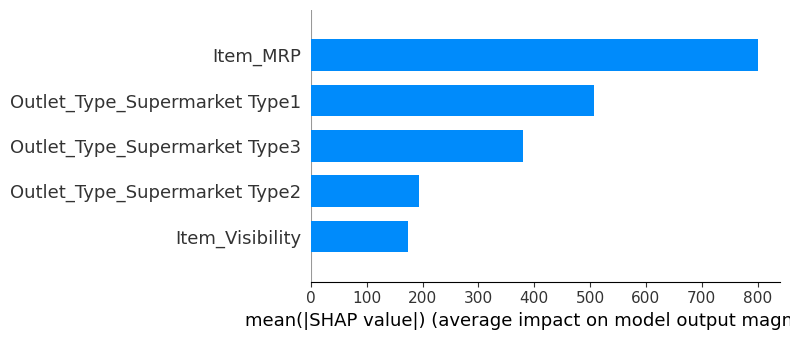

In [208]:
# SHAP values in barplot
# Limit top features to top five most important features according to SHAP
shap.summary_plot(shap_values, features = X_shap, plot_type = 'bar', max_display = 5)

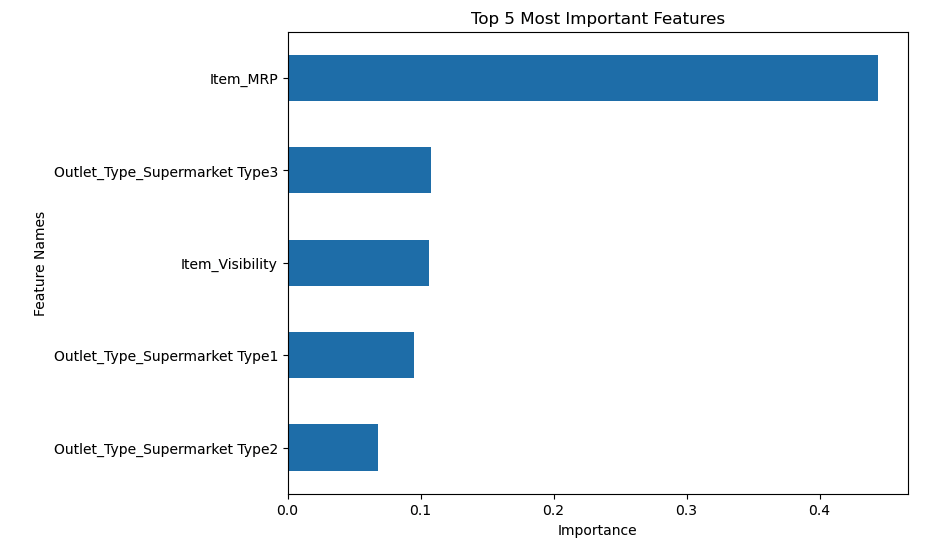

**Feature Importance:** SHAP vs Decision Tree Regression Built-in Method

Comparing the top five most important features between the SHAP calculations and the Decision Tree Regression's built-in method, we can see that order notwithstanding, the top five are the same, in addition to the top feature ('Item_MRP'), which is the same in both. 

In [209]:
# Save figure
# fig.savefig('Images/PPS_SHAP_top5.png',dpi=300)
# ax.get_figure().savefig('Images/PPS_SHAP_top5.png', dpi = 300)

### SHAP Dot Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


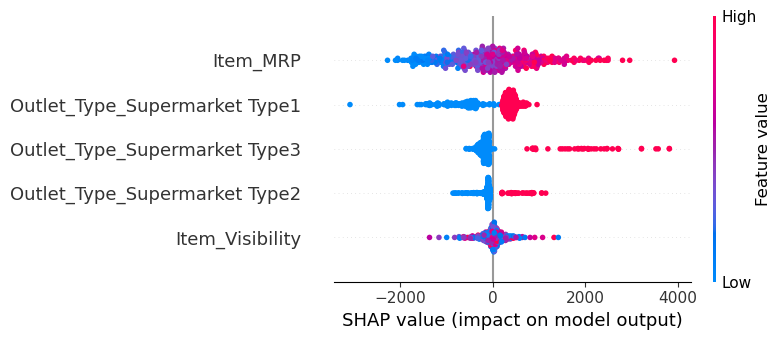

In [210]:
# SHAP values in barplot
shap.summary_plot(shap_values, features = X_shap, plot_type = 'dot', max_display = 5);

**Feature Importance:** SHAP Dot Plot - Top Three (3)

Let's look at the top three most important features as determined by the SHAP dot plot and see how they influence the model's predictions.
1. As 'Item_MRP' increases in value, it increases the target ('Item_Outlet_Sales') most drastically.
2. As 'Outlet_Type_Supermarket Type1' increases in value, only trailing behind 'Item_MRP', it also drastically increases the target ('Item_Outlet_Sales'). 
3. As 'Outlet_Type_Supermarket Type3' increases, just like the top two, it also strongly increases the value of the target. 

# Local Explanations

## Prepare for Lime & Forceplot Analysis


In [217]:
# Verify order of y_shap
y_shap.head()

2937   2,285.03
6371   2,217.11
3762     196.41
419    2,940.17
8475     378.17
Name: Item_Outlet_Sales, dtype: float64

In [218]:
# Sort y_shap from max to min
y_shap_sorted = y_shap.sort_values(ascending=False)

tar_max = y_shap_sorted.max()
tar_min = y_shap_sorted.min()

print(f'Max target value is: {tar_max}')
print(f'Min target value is: {tar_min}')
display(y_shap_sorted)

Max target value is: 10256.649
Min target value is: 45.9402


4888   10,256.65
5977    8,474.30
5977    8,474.30
4681    8,262.58
7690    7,943.66
          ...   
7115      127.83
8103      105.86
2370       73.24
5374       47.94
4219       45.94
Name: Item_Outlet_Sales, Length: 400, dtype: float64

We can see that for the target, the maximum and minimum values are:
* index 4888: 10,256.65
* index 4219:     45.94

We will use these two rows for our analysis.

In [219]:
# Grab index of max and min target values
target_max_index = 4888
target_min_index = 4219

In [224]:
# Create duplicate of X_shap to grab new index using the old index
X_shap_reset_index = X_shap.reset_index(inplace = False)

In [225]:
# Verify copied successfully 
X_shap_reset_index.head()

,index,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,2937,8.37,0.04,191.32,"1,987.00",2.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
1,6371,9.70,0.03,221.31,"2,009.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
2,3762,17.25,0.00,37.58,"1,998.00",0.76,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,419,19.00,0.03,127.33,"2,007.00",0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
4,8475,18.60,0.08,92.54,"1,999.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00


In [226]:
# Grab row with maximum target value
target_max_index_row = X_shap_reset_index.loc[X_shap_reset_index['index'] == target_max_index]
target_max_index_row

,index,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
94,4888,14.85,0.02,261.29,"1,987.00",2.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00


In [227]:
# Grab row with minimum target value
target_min_index_row = X_shap_reset_index.loc[X_shap_reset_index['index'] == target_min_index]
target_min_index_row

,index,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
290,4219,7.63,0.23,45.14,"1,998.00",0.76,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [234]:
target_max_index_new = pd.DataFrame(np.where(X_shap_reset_index['index'] == target_max_index)).iat[0,0]
target_max_index_new

94

In [235]:
target_min_index_new = pd.DataFrame(np.where(X_shap_reset_index['index'] == target_min_index)).iat[0,0]
target_min_index_new

290

In [239]:
# Verify index is working for 'target_min_index_new'
X_shap.iloc[target_min_index_new].head()

Item_Weight                     7.63
Item_Visibility                 0.23
Item_MRP                       45.14
Outlet_Establishment_Year   1,998.00
Outlet_Size                     0.76
Name: 4219, dtype: float64

In [241]:
# Verify index is working for 'target_max_index_new'
X_shap.iloc[target_max_index_new].head()

Item_Weight                    14.85
Item_Visibility                 0.02
Item_MRP                      261.29
Outlet_Establishment_Year   1,987.00
Outlet_Size                     2.00
Name: 4888, dtype: float64

## Lime Analysis

In [216]:
# Lime tabular explanation 

lime_explainer = LimeTabularExplainer(
    training_data = X_shap.values,
    feature_names = X_shap.columns,
    mode = 'regression')

lime_explainer

In [242]:
# Lime explanation for target's minimum value observation
exp_min = lime_explainer.explain_instance(X_shap.iloc[target_min_index_new], dec_tree.predict)
exp_min.show_in_notebook();

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


From the visualization above, we can see that for the target's minimum value observation, these were the features that most heavily influenced the low predictions, according to LIME: 
* The item was NOT sold from any of the 'Outlet_Type_Supermarket Types' (1,2 or 3): a negative influence (-).
* The Item_MRP was less than 99.43: a negative influence (-).
* The other factors that most heavily influenced the prediction is type of food category that it was not a part of:
> * NOT a Household Item: a negative influence (-).
> * NOT a Starchy Food Item: a negative influence (-).
> * NOT Bread-type Item: a negative influence (-).
> * NOT Seafood Item: a negative influence (-).
> * NOT Fruits & Vegetables Item: a negative influence (-).
> * NOT an item of type 'Others': a POSITIVE influence (+).

In [243]:
# Lime explanation for target's maximum value observation
exp_max = lime_explainer.explain_instance(X_shap.iloc[target_max_index_new], dec_tree.predict)
exp_max.show_in_notebook();

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


From the visualization above, we can see that for the target's maximum value observation, these were the features that most heavily influenced the high predictions, according to LIME: 
* The item was NOT sold from 'Outlet_Type_Supermarket Types' (2 or 3): a negative influence (-).
* The item WAS sold from 'Outlet_Type_Supermarket Type1': a POSITIVE influence (+).
* The Item_MRP was higher than 183.59: a POSITIVE influence (+).
* The outlet that the item was sold from was NOT 'Outlet_Identifier_OUT0027' (the highest performing outlet, which can be seen in the 'Future Data from Analysis Option' Section at the end of this notebook).
* The other factors that most heavily influenced the prediction is type of food category that it was not a part of:
> * NOT a Hard Drinks Item: a negative influence (-).
> * NOT an item of type 'Others': a POSITIVE influence (+).
> * NOT a Meat Item: a negative influence (-).
> * NOT a Household Item: a negative influence (-).
> * NOT a Bread Item: a POSITIVE influence (+).

## Forceplot Analysis

In [246]:
# Select row with the target's minimum value observation
row = target_min_index_new
print(f'- Row #: {row}')
print(f'- Target: {y_shap.iloc[row]}')
X_shap.iloc[row].round(2).head()

- Row #: 290
- Target: 45.9402


Item_Weight                     7.63
Item_Visibility                 0.23
Item_MRP                       45.14
Outlet_Establishment_Year   1,998.00
Outlet_Size                     0.76
Name: 4219, dtype: float64

In [238]:
# Individual forceplot for the target's minimum value observation
shap.force_plot(explainer.expected_value, shap_values= shap_values[row].values, features=X_shap.iloc[row])

From the Force Plot visualization above, we can see that for the target's minimum value observation, these were the features that most heavily influenced the low predictions, according to the SHAP Force Plot: 
* The Item_MRP was 45.14: a negative influence (-).
* The item was NOT sold from any of the 'Outlet_Type_Supermarket Types' (1,2 or 3): a negative influence (-).
* The outlet was NOT Outlet_Identifier_OUT018': a negative influence (-).

No positive influences (+) were significant enough to have a label in the visualization. 

In [248]:
# Select row with the target's maximum value observation
row = target_max_index_new
print(f'- Row #: {row}')
print(f'- Target: {y_shap.iloc[row]}')
X_shap.iloc[row].round(2).head()

- Row #: 94
- Target: 10256.649


Item_Weight                    14.85
Item_Visibility                 0.02
Item_MRP                      261.29
Outlet_Establishment_Year   1,987.00
Outlet_Size                     2.00
Name: 4888, dtype: float64

In [249]:
# Individual forceplot for the target's maximum value observation
shap.force_plot(explainer.expected_value, shap_values= shap_values[row].values, features=X_shap.iloc[row])

From the Force Plot visualization above, we can see that for the target's maximum value observation, these were the features that most heavily influenced the high predictions, according to the SHAP Force Plot: 
* The Item_MRP was 261.3: a POSITIVE influence (+).
* The Item_Visibility was 0.0195: a POSITIVE influence (+).
* The Outlet_Size was 2: a POSITIVE influence (+).
* The item WAS sold from 'Outlet_Type_Supermarket Type1': a POSITIVE influence (+).
* The Item_Fat_Content_Regular was 1 (not low-fat): a POSITIVE influence (+).

No negative influences (-) were significant enough to have a label in the visualization. 

# Future Option for Data Analysis 

Select two example outlets.

In this example, we will select the store with the lowest sales and another store, but with the highest sales.

In [211]:
# Notice that we only imported the train, test, split data and cannot view our original, cleaned data
X_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,16.35,0.03,256.46,"2,009.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
7510,15.25,0.00,179.77,"2,009.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
5828,12.35,0.16,157.29,"1,999.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
5327,7.97,0.01,82.33,"2,004.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
4810,19.35,0.02,120.91,"2,002.00",0.76,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,9.39,0.29,139.18,"1,998.00",0.76,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
5191,15.60,0.12,75.67,"2,007.00",0.76,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
5390,17.60,0.02,237.36,"2,002.00",0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
860,20.35,0.05,117.95,"2,007.00",0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00


In [212]:
# Before doing EDA, combine DataFrame back together 
plot_train = pd.concat([X_train, y_train], axis = 1)
plot_test = pd.concat([X_test, y_test], axis = 1)
plot_df = pd.concat([plot_train, plot_test])
plot_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
4776,16.35,0.03,256.46,"2,009.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,515.33
7510,15.25,0.00,179.77,"2,009.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,"3,056.02"
5828,12.35,0.16,157.29,"1,999.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,"1,577.95"
5327,7.97,0.01,82.33,"2,004.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,"1,331.60"
4810,19.35,0.02,120.91,"2,002.00",0.76,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,"1,687.14"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753,17.60,0.01,171.64,"1,987.00",2.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,"3,793.73"
4836,10.20,0.00,143.12,"2,007.00",0.76,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,"2,410.86"
8064,8.10,0.13,210.49,"2,002.00",0.76,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,"5,309.76"
4418,6.59,0.03,119.01,"1,999.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,"2,530.71"


In [213]:
# Create list of OHE 'Outlet_Identifier_OUTxxx' features to prepare for analysis of Outlet_Identifiers
Outlet_Identifiers = ['Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049']
Outlet_Identifiers

['Outlet_Identifier_OUT013',
 'Outlet_Identifier_OUT017',
 'Outlet_Identifier_OUT018',
 'Outlet_Identifier_OUT019',
 'Outlet_Identifier_OUT027',
 'Outlet_Identifier_OUT035',
 'Outlet_Identifier_OUT045',
 'Outlet_Identifier_OUT046',
 'Outlet_Identifier_OUT049']

In [214]:
# Make dictionary of outlet names, with mean and sum of target ('Item_Outlet_Sales')

Outlet_Identifier_avgs = {'outlet':[],'mean':[], 'sum':[]}

for outlet in Outlet_Identifiers:
    
    OI_mean = plot_df.query(f'{outlet} == 1').groupby([f'{outlet}'])['Item_Outlet_Sales']
    
    Outlet_Identifier_avgs['outlet'].append(outlet)
    Outlet_Identifier_avgs['mean'].append(OI_mean.mean().tolist()[0])
    Outlet_Identifier_avgs['sum'].append(OI_mean.sum().tolist()[0])
    
Outlet_Identifier_avgs

{'outlet': ['Outlet_Identifier_OUT013',
  'Outlet_Identifier_OUT017',
  'Outlet_Identifier_OUT018',
  'Outlet_Identifier_OUT019',
  'Outlet_Identifier_OUT027',
  'Outlet_Identifier_OUT035',
  'Outlet_Identifier_OUT045',
  'Outlet_Identifier_OUT046',
  'Outlet_Identifier_OUT049'],
 'mean': [2298.995255579399,
  2340.67526349892,
  1995.498739224138,
  340.3297227272727,
  3694.0385576470585,
  2438.841866021505,
  2192.384797631862,
  2277.8442668817206,
  2348.3546346236562],
 'sum': [2142663.5782,
  2167465.2939999998,
  1851822.83,
  179694.0936,
  3453926.0513999998,
  2268122.9354,
  2036725.477,
  2118395.1682,
  2183969.8102]}

In [215]:
# zip dictionary into new dataframe sorted by largest sales sum
df_outlets = pd.DataFrame(Outlet_Identifier_avgs, columns = ['outlet', 'mean', 'sum'])
df_outlets = df_outlets.sort_values(by=['sum'], ascending=False)
df_outlets

,outlet,mean,sum
4,Outlet_Identifier_OUT027,"3,694.04","3,453,926.05"
5,Outlet_Identifier_OUT035,"2,438.84","2,268,122.94"
8,Outlet_Identifier_OUT049,"2,348.35","2,183,969.81"
1,Outlet_Identifier_OUT017,"2,340.68","2,167,465.29"
0,Outlet_Identifier_OUT013,"2,299.00","2,142,663.58"
7,Outlet_Identifier_OUT046,"2,277.84","2,118,395.17"
6,Outlet_Identifier_OUT045,"2,192.38","2,036,725.48"
2,Outlet_Identifier_OUT018,"1,995.50","1,851,822.83"
3,Outlet_Identifier_OUT019,340.33,"179,694.09"


We can see that the outlet with the both the highest mean sales and total sales is:
* 'Outlet_Identifier_OUT027'

We can also see that the outlet with both the lowest mean sales and total sales is:
* 'Outlet_Identifier_OUT019'

By comparing the sales performance of our 'Outlet_Identifiers' to the SHAP graph below, we can see that indeed, 'Outlet_Identifier_OUT027' is the most important outlet feature for determining the highest sales for outlets ('Item_Outlet_Sales').

This would be an interesting topic for further EDA.